<a href="https://colab.research.google.com/github/Sahil-Jagadale/DL/blob/main/CBOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
corpus = ['The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. ']

In [6]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
print("After converting words in corpus into vector of integers: -")
print(sequences)

After converting words in corpus into vector of integers: -
[[1, 18, 2, 19, 3, 20, 21, 22, 2, 23, 10, 1, 24, 25, 4, 26, 11, 12, 27, 28, 29, 1, 13, 30, 31, 14, 32, 2, 33, 34, 11, 12, 5, 6, 1, 13, 10, 35, 36, 15, 7, 8, 9, 1, 5, 6, 16, 7, 8, 9, 3, 37, 14, 38, 39, 40, 17, 41, 16, 4, 9, 1, 5, 6, 3, 42, 17, 43, 44, 45, 4, 46, 47, 48, 15, 7, 8]]


In [7]:
vocab_size = len(tokenizer.word_index)+1
embedding_size = 10
window_size = 3

In [8]:
contexts = []
targets = []

for seq in sequences:
  for i in range(window_size,len(seq)-window_size):
    context = seq[i-window_size:i]+seq[i+1:i+window_size+1]
    target = seq[i]
    contexts.append(context)
    targets.append(target)

x = np.array(contexts)
y = to_categorical(targets,vocab_size)

In [11]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=2*window_size))
model.add(Lambda(lambda x: tf.reduce_mean(x,axis=1)))
model.add(Dense(vocab_size, activation='softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [14]:
model.fit(x,y,epochs=20,verbose=0)

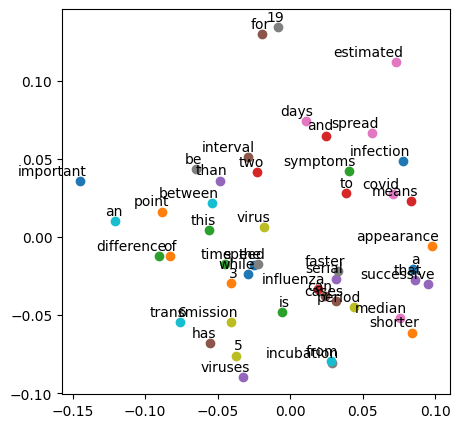

In [16]:
embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(5,5))
for i,word in enumerate(tokenizer.word_index.keys()):
  x,y = reduced_embeddings[i]
  plt.scatter(x,y)
  plt.annotate(word,xy=(x,y),xytext=(5,2), textcoords='offset points', ha='right', va='bottom')

plt.show()